# Decision Trees

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Preparations

In [2]:
df = pd.read_csv('all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)

#### 1. Inspect the size of the dataset

In [5]:
df.head(5)

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE
PAL0708,6,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,A_5,MALE


#### 2. Select the Species column to use as target

In [6]:
y = df['Species']

#### 3. Select two columns to use as input features

In [14]:
X = df[['Culmen Length (mm)', 'Flipper Length (mm)']]

#### 4. Plot the data

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Flipper Length (mm)'>

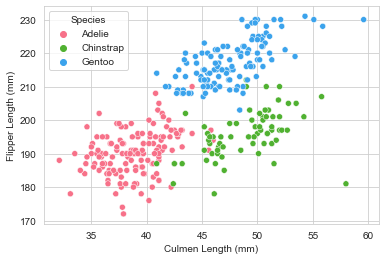

In [31]:
sns.set_style('whitegrid')
sns.scatterplot(x='Culmen Length (mm)', y='Flipper Length (mm)', hue='Species', data=df, palette='husl')

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [13]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['Culmen Length (mm)'] < 48:
        predictions.append('Adelie')
    else:
        if row['Flipper Length (mm)'] < 208:
            predictions.append('Chinstrap')
        else:
            predictions.append('Gentoo')

#### 6. Calculate the accuracy of the model

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.7035928143712575

## Find the optimal separation with Scikit

#### 7. Train the model

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(X,y)

DecisionTreeClassifier(max_depth=2)

#### 8. Make predictions

In [28]:
ypred = m.predict(X)

#### 9. Calculate the accuracy

In [29]:
accuracy_score(ypred,y)

0.9520958083832335

## Plot the tree

#### 10. Plot the tree with according labels

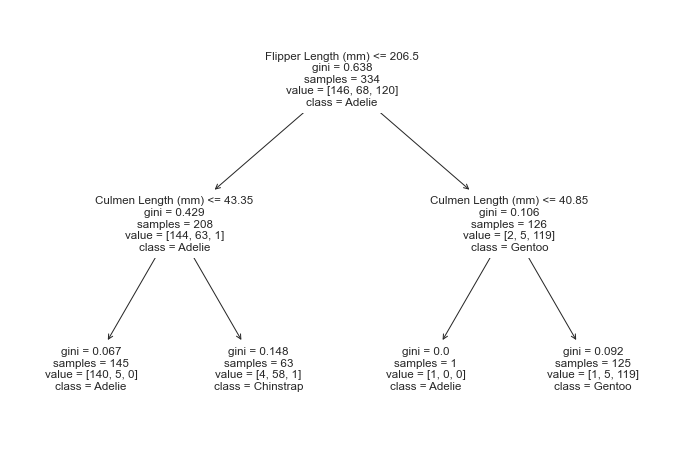

In [36]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=X.columns, class_names=m.classes_)